# Question 01.
Build a machine learning model to predict user will click the ad or not
based on his experience and estimated salary for a given dataset. \
[https://drive.google.com/open?id=1I8KsCufEa47XvzrkxhntEWSy1Su0E0NY]

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import *
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("Social_Network_Ads.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [4]:
df.head()   # Printing the first 5 rows of data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()       # Getting basic information about each column and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isna().sum()     # Checking for any null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.describe()       # Printing a statistical summary of data

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:>

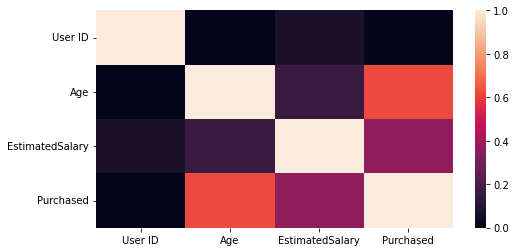

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
sn.heatmap(df.corr())
# df.corr() Gives correlation matrix
# here it shows the correlation between features by color mentioned on right side

In [9]:
df = df.drop('User ID', axis=1)     # We are dropping the column 'userID' as it is not required for the analysis

In [10]:
df.head()       # reprinting the first 5 rows of data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Exploratory Data Analysis

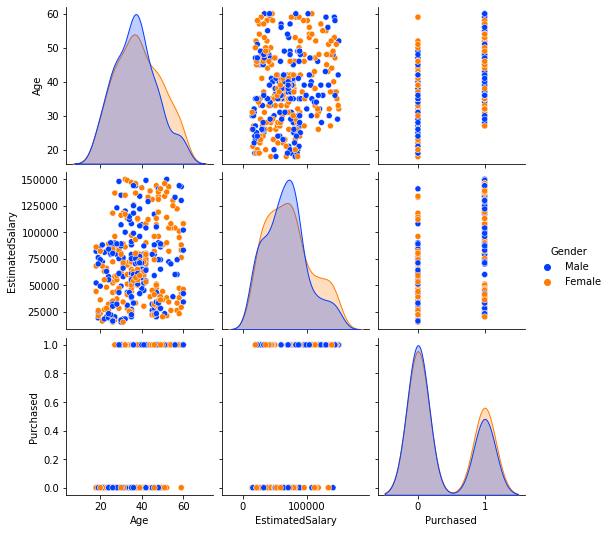

In [11]:
sn.pairplot(df,hue='Gender',palette='bright')       # Getting a visual representation of the data and relationship between the features

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

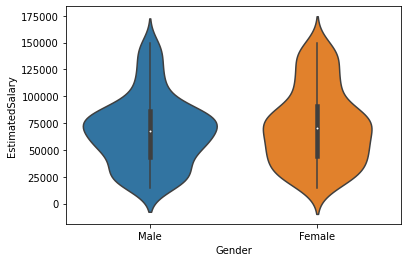

In [12]:
sn.violinplot(x='Gender',y='EstimatedSalary',data=df)       # Visualizes the distribution of data, here it is the salary of each gender

<AxesSubplot:xlabel='Purchased', ylabel='count'>

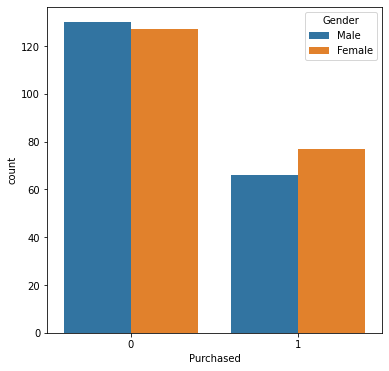

In [13]:
plt.figure(figsize=(6,6))
sn.countplot(x='Purchased',data=df,hue='Gender')
# Here we'll see the count of  males who have purchased and who have not

In [14]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Data Cleaning And Scaling

In [15]:
y = df['Purchased']     # Separating the output/outcome column

In [16]:
data = df.drop('Purchased', axis=1)      # Dropping the column from main data post separation

In [17]:
data.head()         # Printing the first 5 rows

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


> Conversion of categorical data to equivalent numerical values

In [18]:
lb_encoder = LabelEncoder()
data['Gender'] = (pd.DataFrame(data['Gender'])).apply(lb_encoder.fit_transform)

In [19]:
data.head()     # Printing the first 5 rows post encoding

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


### Train/Test Split

In [20]:
# Splitting the data into training and testing data
X_train = data[['Age','EstimatedSalary']]
X_train,X_test,Y_train,Y_test = train_test_split(X_train, y ,test_size = 0.3)

In [21]:
import pickle

### Model Fitting and Training

In [22]:
def DT_Classifier(X_train,Y_train,X_test,Y_test):
    classifier = RandomForestClassifier(criterion='entropy',random_state=2)
    classifier.fit(X_train,Y_train)
    file = open('Q1Classifier.pkl','wb')
    pickle.dump(classifier,file)
    file.close()
    Ypred = classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test,Ypred)
    print("Accuracy using the accuracy score is = {}\n\nThe confusion matrix is: \n{}".format(accuracy_score(Ypred, Y_test)*100, conf_matrix))
    return classifier

In [23]:
classifier = DT_Classifier(X_train,Y_train,X_test,Y_test)

Accuracy using the accuracy score is = 88.33333333333333

The confusion matrix is: 
[[61 11]
 [ 3 45]]
